In [13]:
#time series analysis using random forest regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = pd.read_csv("covid19_timeseries.csv")

In [15]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [16]:
df['Recovered Cases'] = df['Recovered Cases'].fillna(0)

In [17]:
df_grouped = df.groupby('Dates')[['Confirmed Cases', 'Death Cases', 'Recovered Cases']].sum().reset_index()

In [18]:
df_grouped['days'] = (df_grouped['Dates'] - df_grouped['Dates'].min()).dt.days

In [19]:
X = df_grouped[['days']]
y = df_grouped['Confirmed Cases']

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [21]:
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [22]:
y_pred = model.predict(X)

In [23]:
mse = mean_squared_error(y, y_pred)  # mean squared error
rmse = np.sqrt(mse)  # root mean squared error
r2 = r2_score(y, y_pred)  # R-squared score

In [24]:
accuracy = r2 * 100

In [25]:
print("Random Forest RMSE:", rmse)
print("Random Forest R² Score:", r2)
print(f"Random Forest Accuracy: {accuracy:.2f}%")

Random Forest RMSE: 50163.526406869314
Random Forest R² Score: 0.999985640400477
Random Forest Accuracy: 100.00%


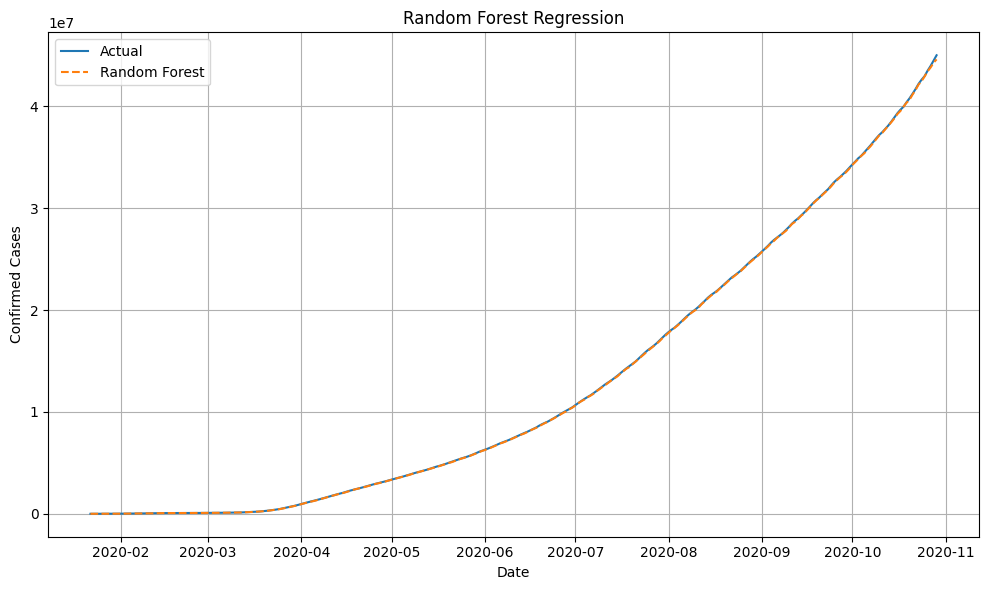

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Dates'], y, label='Actual')
plt.plot(df_grouped['Dates'], y_pred, label='Random Forest', linestyle='--')
plt.title('Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()